In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.inferno
import scipy as sp
from scipy.integrate import quad

In [8]:
def integrandx(t, x_R, y_R, z_R , a , N):
    numer = ( a*N*np.cos(N*t)*np.sin(t) + (1+a*np.sin(N*t))*np.cos(t) )
    denom = ( (x_R-np.cos(t)-a*np.sin(N*t)*np.cos(t))**2 + (y_R - np.sin(t)-a*np.sin(N*t)*np.sin(t))**2 + (z_R)**2 )**(3/2)
    return  numer/denom


def integrandy(t, x_R, y_R, z_R, a , N):
    numer = ( a*N*np.cos(N*t)*np.cos(t) + (1+a*np.sin(N*t))*np.sin(t) )
    denom = ( (x_R-np.cos(t)-a*np.sin(N*t)*np.cos(t))**2 + (y_R - np.sin(t)-a*np.sin(N*t)*np.sin(t))**2 + (z_R)**2 )**(3/2)
    return  numer/denom


def integrandz(t, x_R, y_R, z_R, a, N):
    term1 = (y_R - np.sin(t)-a*np.sin(N*t)*np.sin(t))*( a*N*np.cos(N*t)*np.cos(t) + (1+a*np.sin(N*t))*np.sin(t) )
    term2 = (x_R-np.cos(t)-a*np.sin(N*t)*np.cos(t))*( a*N*np.cos(N*t)*np.sin(t) + (1+a*np.sin(N*t))*np.cos(t) )
    numer = term1 - term2
    denom = ( (x_R-np.cos(t)-a*np.sin(N*t)*np.cos(t))**2 + (y_R - np.sin(t)-a*np.sin(N*t)*np.sin(t))**2 + (z_R)**2 )**(3/2)
    return  numer/denom

def Bx(x_R, y_R, z_R  , a  , N):
    return z_R * quad(integrandx, 0, 2*np.pi, args=(x_R, y_R, z_R , a , N))[0] 


def By(x_R, y_R, z_R , a  , N):
    return z_R* -quad(integrandy, 0, 2*np.pi, args=(x_R, y_R, z_R , a , N))[0] 


def Bz(x_R, y_R, z_R , a  , N):
    return quad(integrandz, 0, 2*np.pi, args=(x_R, y_R, z_R , a , N))[0] 

In [51]:
quad?

# Q1 b) Quiver Map and Heat Plot

In [13]:
x_R = np.linspace(-2, 2, 100)
y_R = np.linspace(-2, 2, 100)
xh, yh = np.meshgrid(x_R, y_R)

x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
xq, yq = np.meshgrid(x, y)

In [14]:
a = 3/4 ; N = 3
#For heat plot
mag_field_z1 = np.vectorize(Bz)(xh, yh, -0.5 , a , N)
mag_field_z2 = np.vectorize(Bz)(xh, yh, -0.25 , a , N)
mag_field_z3 = np.vectorize(Bz)(xh, yh, 0.25 , a , N)
mag_field_z4 = np.vectorize(Bz)(xh, yh, 0.5 , a , N)
# For quiver plot
mag_field_x1 = np.vectorize(Bx)(xq, yq, -0.5 , a , N)
mag_field_y1 = np.vectorize(By)(xq, yq, -0.5 , a , N)
mag_field_x2 = np.vectorize(Bx)(xq, yq, -0.25 , a , N)
mag_field_y2 = np.vectorize(By)(xq, yq, -0.25 , a , N)
mag_field_x3 = np.vectorize(Bx)(xq, yq, 0.25 , a , N)
mag_field_y3 = np.vectorize(By)(xq, yq, 0.25 , a , N)
mag_field_x4 = np.vectorize(Bx)(xq, yq, 0.5 , a , N)
mag_field_y4 = np.vectorize(By)(xq, yq, 0.5 , a , N)

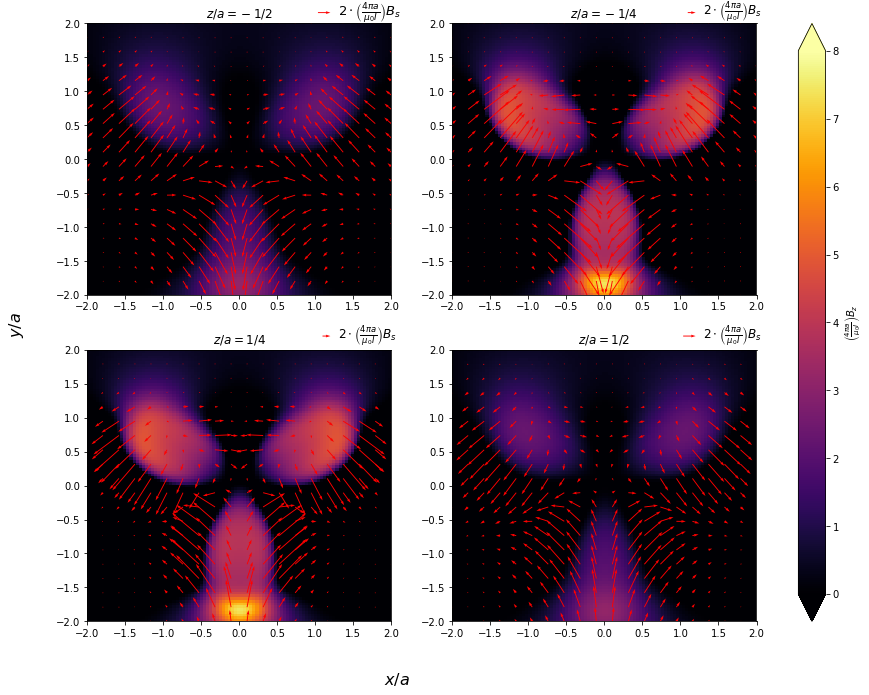

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15,11))

# Upper Left
ax = axes[0,0]
cs = ax.pcolor(xh, yh, mag_field_z1, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xq, yq, mag_field_x1, mag_field_y1, units='width', color='r')
ax.set_title('$z/R = -1/2$')
qk = ax.quiverkey(Q, 0.8, 1.04, 2, r'$2 \cdot \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':13})

# Upper Right
ax = axes[0,1]
cs = ax.pcolor(xh, yh, mag_field_z2, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xq, yq, mag_field_x2, mag_field_y2, units='width', color='r')
ax.set_title('$z/R = -1/4$')
qk = ax.quiverkey(Q, 0.8, 1.04, 2, r'$2 \cdot \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':12})

# Lower Left
ax = axes[1,0]
cs = ax.pcolor(xh, yh, mag_field_z3, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xq, yq, mag_field_x3, mag_field_y3, units='width', color='r')
ax.set_title('$z/R = 1/4$')
qk = ax.quiverkey(Q, 0.8, 1.05, 2, r'$2 \cdot \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':12})

# Lower Right
ax = axes[1,1]
cs = ax.pcolor(xh, yh, mag_field_z4, cmap=cmap, vmin=0, vmax=8)
Q = ax.quiver(xq, yq, mag_field_x4, mag_field_y4, units='width', color='r')
ax.set_title('$z/R = 1/2$')
qk = ax.quiverkey(Q, 0.8, 1.05, 2, r'$2 \cdot \left( \frac{4 \pi a}{\mu_0 I} \right)B_s$', labelpos='E',
                   coordinates='axes', fontproperties={'size':12})


cbar = fig.colorbar(cs, ax=axes, extend='both', label=r'$\left( \frac{4 \pi a}{\mu_0 I} \right)B_z$')
fig.text(0.4, 0.045, '$x/R$', fontsize=16)
fig.text(0.06, 0.5, '$y/R$', ha='center', va='center', rotation='vertical', fontsize=16)

plt.show()

# Q1 c) Streamline Plot

In [21]:
x = np.linspace(-2, 2, 40)
z = np.linspace(-2, 2, 40)
xd, zd = np.meshgrid(x, z)
mag_field_x1 = np.vectorize(Bx)(xd, -1, zd , a , N)
mag_field_z1 = np.vectorize(Bz)(xd, -1, zd , a , N)

mag_field_x2 = np.vectorize(Bx)(xd, 0, zd , a , N)
mag_field_z2 = np.vectorize(Bz)(xd, 0, zd , a , N)

mag_field_x3 = np.vectorize(Bx)(xd, 1, zd , a , N)
mag_field_z3 = np.vectorize(Bz)(xd, 1, zd , a , N)

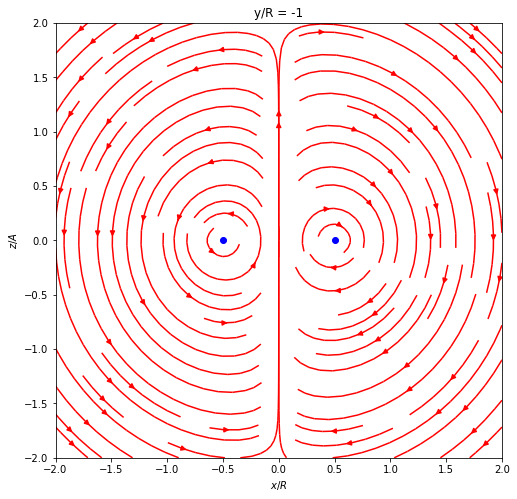

Text(0.5, 1.0, 'y/R = 1')

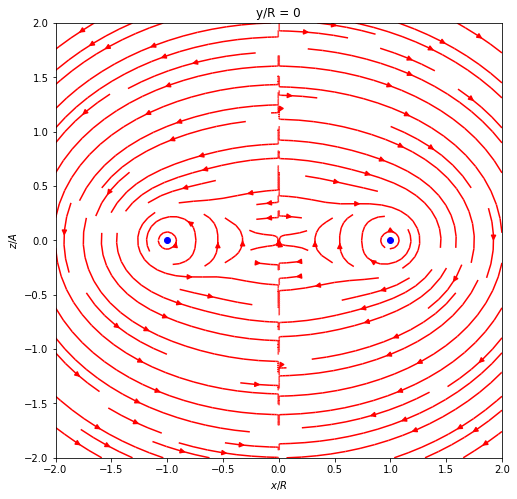

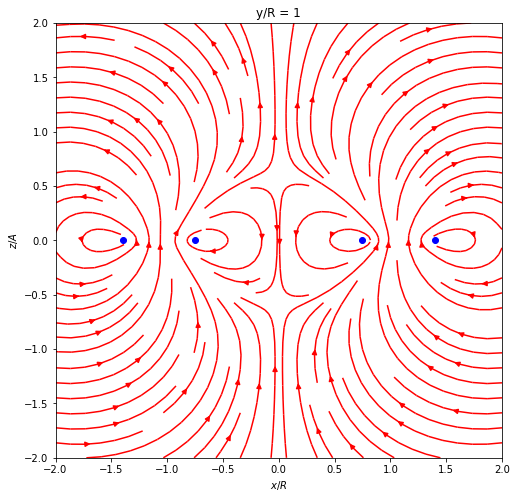

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.streamplot(xd, zd, mag_field_x1, mag_field_z1, color='r')
ax.scatter([-0.5], [0], color='blue', zorder=100)
ax.scatter([0.5], [0], color='blue', zorder=100)
ax.set_xlabel('$x/R$')
ax.set_ylabel('$z/A$')
ax.set_title('y/R = -1')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.streamplot(xd, zd, mag_field_x2, mag_field_z2, color='r')
ax.scatter([-1], [0], color='blue', zorder=100)
ax.scatter([1], [0], color='blue', zorder=100)
ax.set_xlabel('$x/R$')
ax.set_ylabel('$z/A$')
ax.set_title('y/R = 0')

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.streamplot(xd, zd, mag_field_x3, mag_field_z3, color='r')
ax.scatter([-1.4], [0], color='blue', zorder=100)
ax.scatter([-0.75], [0], color='blue', zorder=100)
ax.scatter([0.75], [0], color='blue', zorder=100)
ax.scatter([1.4], [0], color='blue', zorder=100)
ax.set_xlabel('$x/R$')
ax.set_ylabel('$z/A$')
ax.set_title('y/R = 1')

# Q1 d) Amperian Loop

I'm sorry, I could not get this to work.  I also had some confusion about what the question was asking for :(

Please see also my attached written notes 

In [44]:
def integrand_amperian(t, x_R, y_R, z_R, a, N , n):
    
    ##Term 1 
    numerBx = ( a*N*np.cos(N*t)*np.sin(t) + (1+a*np.sin(N*t))*np.cos(t) )
    denomBx = ( (x_R-np.cos(t)-a*np.sin(N*t)*np.cos(t))**2 + (y_R - np.sin(t)-a*np.sin(N*t)*np.sin(t))**2 + (z_R)**2 )**(3/2)
    term_1 = (numerBx/denomBx)*(np.sin(t))
    
    ## Term 2
    term1z = (y_R - np.sin(t)-a*np.sin(N*t)*np.sin(t))*( a*N*np.cos(N*t)*np.cos(t) + (1+a*np.sin(N*t))*np.sin(t) )
    term2z = (x_R-np.cos(t)-a*np.sin(N*t)*np.cos(t))*( a*N*np.cos(N*t)*np.sin(t) + (1+a*np.sin(N*t))*np.cos(t) )
    numerBz = term1z - term2z
    denomBz = ( (x_R-np.cos(t)-a*np.sin(N*t)*np.cos(t))**2 + (y_R - np.sin(t)-a*np.sin(N*t)*np.sin(t))**2 + (z_R)**2 )**(3/2)
    term_2 = (numerBz/denomBz)*(np.cos(t))
    
    return -term_1 + term_2

In [49]:
def AmperianLoop(x_R, y_R, z_R  , a  , N , n):
    return (n/(4*np.pi)) * quad(integrand_amperian, 0, 2*np.pi, args=(x_R, y_R, z_R , a , N,n))[0] 